In [3]:
import numpy as np
import pandas as pd

df=pd.read_csv("/content/diabetes.csv");
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


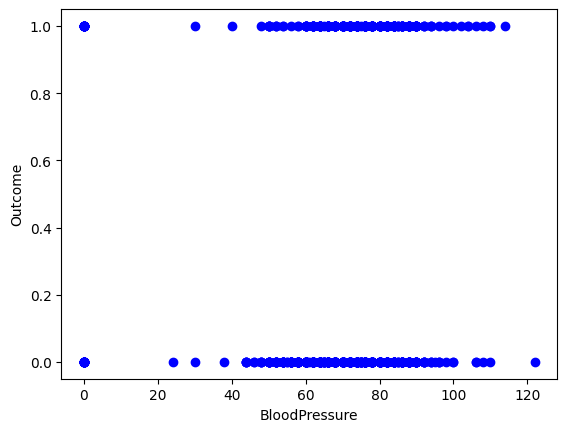

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['BloodPressure'],df['Outcome'],color='blue')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Feature(s): These are the independent variables that are used as input to make predictions. Features are often the columns in your dataset that contain the information needed to predict the target. In this case, 'Glucose' is the feature you're selecting.

Target: This is the dependent variable you are trying to predict. The target is usually a column in the dataset that you want the model to estimate or classify. In your case, 'Outcome' is the target variable, which could be a binary (0 or 1) value indicating some outcome (e.g., whether a patient has diabetes).



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# Selecting 'Glucose' as the feature and 'Outcome' as the target
x = df[['BloodPressure']]  # Feature: this is what you're using to make predictions
y = df['Outcome']    # Target: this is what you're trying to predict

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42);

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
# Coefficients
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Residual sum of squares (RSS)
print(f"Residual Sum of Squares (RSS): {((y_test - y_pred) ** 2).sum()}")

# Coefficient of determination (R^2)
print(f"Coefficient of Determination (R^2): {r2_score(y_test, y_pred)}")


Coefficient (Slope): 0.0021112353812824764
Intercept: 0.20035348015368007
Residual Sum of Squares (RSS): 35.64748096649817
Coefficient of Determination (R^2): -0.008211582890857771


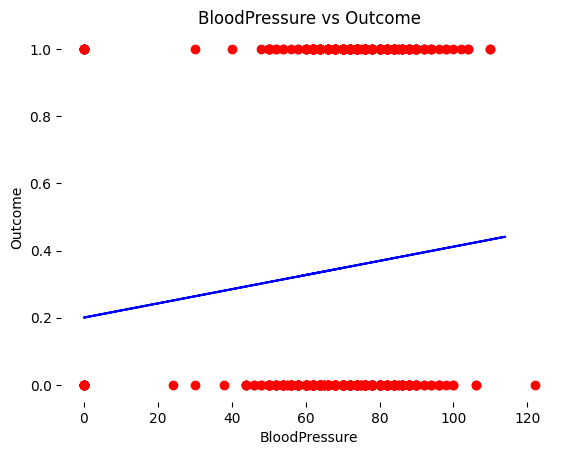

In [12]:
plt.scatter(x_train, y_train, color = 'lightcoral')
plt.plot(x_test, y_pred, color = 'firebrick')
plt.title('BloodPressure vs Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.box(False)
plt.show()